* **NOTE:** This notebook is trained on Google Colaboratory

## Importing Libraries

In [0]:
import tensorflow as tf

import os
import zipfile
import random
import numpy as np

import matplotlib.image as mpImg
import matplotlib.pyplot as plt
%matplotlib inline

## Analyzing Dataset

In [0]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
#     -O /tmp/horse-or-human.zip

# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
#     -O /tmp/validation-horse-or-human.zip

In [0]:
local_training_zip = '/content/drive/My Drive/Colab Notebooks/horse-or-human.zip'
if zipfile.is_zipfile(local_training_zip):
    zip_ref = zipfile.ZipFile(file=local_training_zip, mode='r')
    zip_ref.extractall('/tmp/data/train/')
    zip_ref.close()
    
local_validation_zip = '/content/drive/My Drive/Colab Notebooks/validation-horse-or-human.zip'
if zipfile.is_zipfile(local_validation_zip):
    zip_ref = zipfile.ZipFile(file=local_validation_zip, mode='r')
    zip_ref.extractall('/tmp/data/validation/')
    zip_ref.close()

In [4]:
print('Training images of horses: ', len(os.listdir('/tmp/data/train/horses/')))
print('Training images of humans: ', len(os.listdir('/tmp/data/train/humans/')))
print('Validating images of horses: ', len(os.listdir('/tmp/data/validation/horses/')))
print('Validating images of humans: ', len(os.listdir('/tmp/data/validation/humans/')))

Training images of horses:  500
Training images of humans:  527
Validating images of horses:  128
Validating images of humans:  128


In [5]:
random.choice(os.listdir('/tmp/data/train/horses/'))

'horse26-5.png'

Random 5 images of horses and humans each from training set


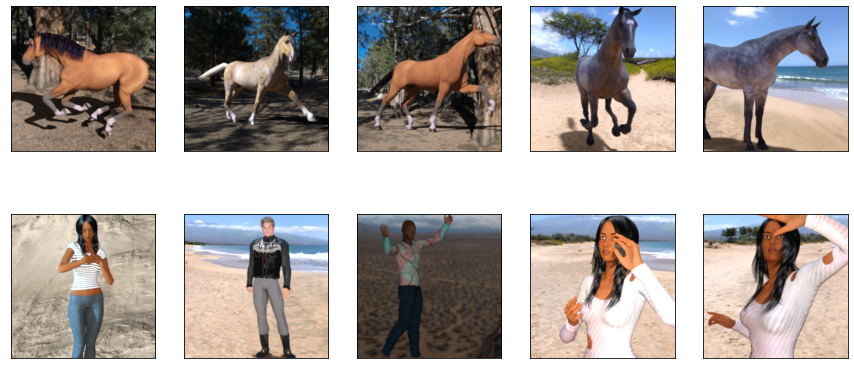

In [6]:
print('Random 5 images of horses and humans each from training set')
plt.figure(figsize=(15, 7))
i = 1
while(i<6):
    img_name = random.choice(os.listdir('/tmp/data/train/horses/'))
    img = mpImg.imread('/tmp/data/train/horses/' + img_name)
    plt.subplot(2, 5, i)
    plt.imshow(img)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])
    
    img_name = random.choice(os.listdir('/tmp/data/train/humans/'))
    img = mpImg.imread('/tmp/data/train/humans/' + img_name)
    plt.subplot(2, 5, 5+i)
    plt.imshow(img)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])
    
    i += 1

In [7]:
img = mpImg.imread('/tmp/data/train/horses/horse01-0.png')
img.shape

(300, 300, 4)

## Creating the Model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

## Model Summary

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

## Compiling the Model

In [0]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['acc'])

## Importing Images from Directories

In [11]:
# Training data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/tmp/data/train/',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

# Validation data
validate_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255
)

validate_generator = validate_datagen.flow_from_directory(
    '/tmp/data/validation/',
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Setting the Callback for the Model

In [0]:
# callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/model/cp.ckpt',
                                                 monitor='val_loss',
                                                 save_weights_only=False,
                                                 save_best_only=False,
                                                 save_freq='epoch',
                                                 verbose=1)

## Training the Model

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    validation_data=validate_generator,
    validation_steps=8,
    verbose=1,
    callbacks=[cp_callback]
)

Epoch 1/15
8/8 [==============================] - ETA: 0s - loss: 0.6783 - acc: 0.5996
Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/model/cp.ckpt
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/model/cp.ckpt/assets
8/8 [==============================] - 8s 1s/step - loss: 0.6783 - acc: 0.5996 - val_loss: 0.5692 - val_acc: 0.6641
Epoch 2/15
8/8 [==============================] - ETA: 0s - loss: 0.4828 - acc: 0.7864
Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/model/cp.ckpt
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/model/cp.ckpt/assets
8/8 [==============================] - 9s 1s/step - loss: 0.4828 - acc: 0.7864 - val_loss: 0.4480 - val_acc: 0.8594
Epoch 3/15
8/8 [==============================] - ETA: 0s - loss: 0.2742 - acc: 0.8999
Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks

## Analyzing the Trained Model

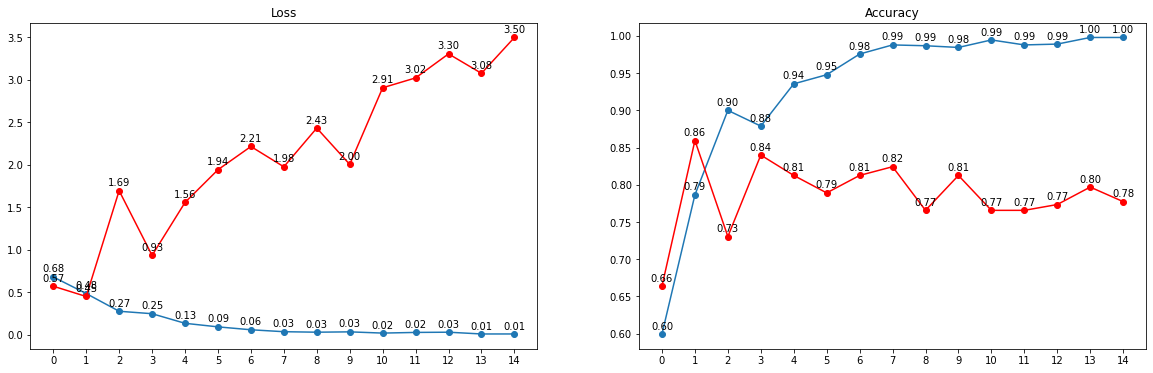

In [14]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], marker='o')
plt.title('Loss')
plt.xticks(history.epoch)
for x, y in zip(history.epoch, history.history['loss']):
    label = "{:.2f}".format(y)
    plt.annotate(label,                               # this is the text
                 (x, y),                              # this is the point to label
                 textcoords="offset points",          # how to position the text
                 xytext=(0, 5),                       # distance from text to points (x,y)
                 ha='center')                         # horizontal alignment can be left, right or center

plt.plot(history.history['val_loss'], color='r', marker='o')
plt.title('Loss')
plt.xticks(history.epoch)
for x, y in zip(history.epoch, history.history['val_loss']):
    label = "{:.2f}".format(y)
    plt.annotate(label,                               # this is the text
                 (x, y),                              # this is the point to label
                 textcoords="offset points",          # how to position the text
                 xytext=(0, 5),                       # distance from text to points (x,y)
                 ha='center')                         # horizontal alignment can be left, right or center

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], marker='o')
plt.title('Accuracy')
plt.xticks(history.epoch)
for x, y in zip(history.epoch, history.history['acc']):
    label = "{:.2f}".format(y)
    plt.annotate(label,                               # this is the text
                 (x, y),                              # this is the point to label
                 textcoords="offset points",          # how to position the text
                 xytext=(0, 5),                       # distance from text to points (x,y)
                 ha='center')                         # horizontal alignment can be left, right or center

plt.plot(history.history['val_acc'], color='r', marker='o')
plt.title('Accuracy')
plt.xticks(history.epoch)
for x, y in zip(history.epoch, history.history['val_acc']):
    label = "{:.2f}".format(y)
    plt.annotate(label,                               # this is the text
                 (x, y),                              # this is the point to label
                 textcoords="offset points",          # how to position the text
                 xytext=(0, 5),                       # distance from text to points (x,y)
                 ha='center')                         # horizontal alignment can be left, right or center

## Visualizing Intermediate Activations

In [15]:
model.layers[0].output

<tf.Tensor 'conv2d/Identity:0' shape=(None, 298, 298, 16) dtype=float32>

In [16]:
# Extracts the outputs of the layers
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# custom image path from directory
img_path = '/content/drive/My Drive/Colab Notebooks/horse1.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(300, 300), color_mode='rgb')
img_tensor = tf.keras.preprocessing.image.img_to_array(img)

# Returns a list of Numpy arrays: one array per layer activation
img_tensor = np.expand_dims(img_tensor, axis=0)
activations = activation_model.predict(img_tensor)

print('No. of layers: ', len(activations))

No. of layers:  13


In [17]:
first_layer_activation = activations[0]
first_layer_activation.shape
# output => (img_count, height, weight, filters_count)

(1, 298, 298, 16)

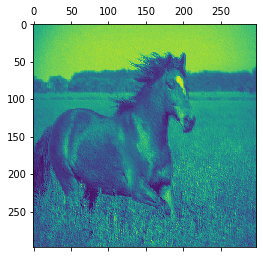

In [18]:
# plotting the fourth channel of the activation of the first layer of the original model
plt.matshow(first_layer_activation[0, :, :, 4])

## Class Indices for Model

In [19]:
train_generator.class_indices

{'horses': 0, 'humans': 1}

## Testing the Model against a Image

In [0]:
# loading best saved model
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/model/cp.ckpt')

In [0]:
# custom image path from directory
img_path = '/content/drive/My Drive/Colab Notebooks/horse1.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(300, 300), color_mode='rgb')
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = img_tensor/255.0

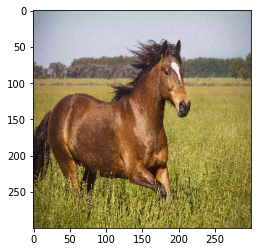

In [22]:
plt.imshow(img_tensor.reshape(300, 300, 3))

In [0]:
img_tensor = np.expand_dims(img_tensor, axis=0)

In [24]:
if model.predict(img_tensor)>0.5:
    print('Human')
else:
    print('Horse')

Horse
